# Linear Regression with Boston House Price
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

![title](https://images.unsplash.com/photo-1475855581690-80accde3ae2b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

In [28]:
from sklearn.datasets import load_boston # dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

## Data Preparation

In [30]:
# データのロード、データフレーム化
boston = load_boston()
# 特徴量
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数
target = pd.DataFrame(boston.target, columns=["House Price"])
print(df.shape, target.shape)

(506, 13) (506, 1)


###### 特徴のデスクリプション

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.   
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
LSTAT - % lower status of the population   
MEDV - Median value of owner-occupied homes in $1000's  

In [31]:
# 説明変数と目的変数を合体
full_data = pd.concat([df, target], axis = 1)
full_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Feature Selection 特徴量の取捨選択
2変数間の分布を可視化するグラフ

In [32]:
# 欠損値がない綺麗なデータ
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


None


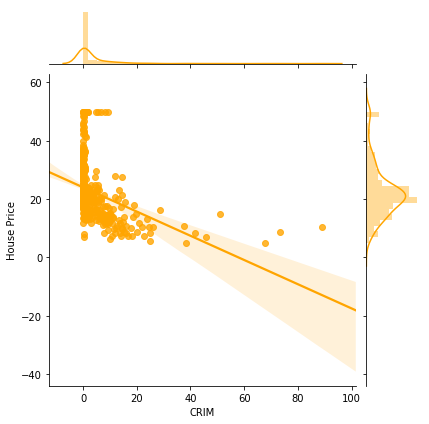

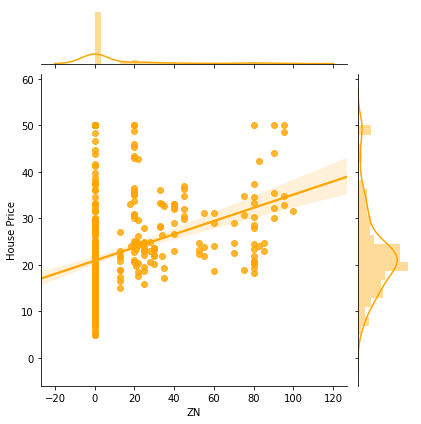

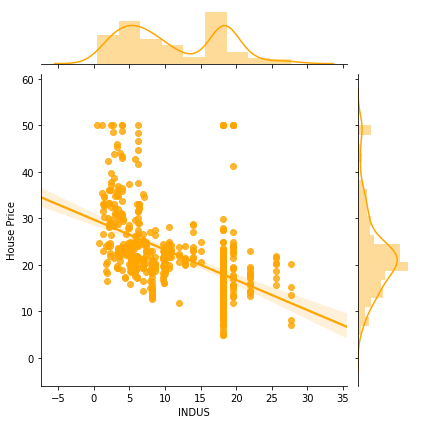

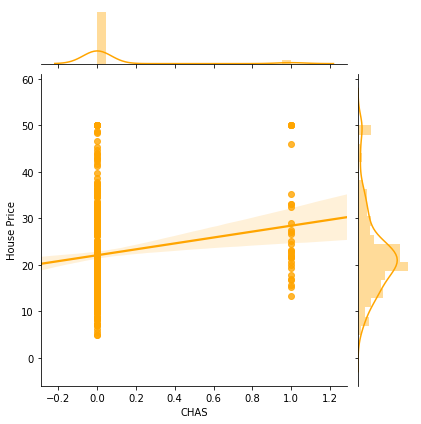

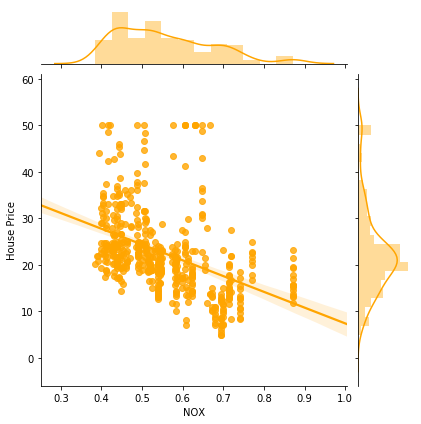

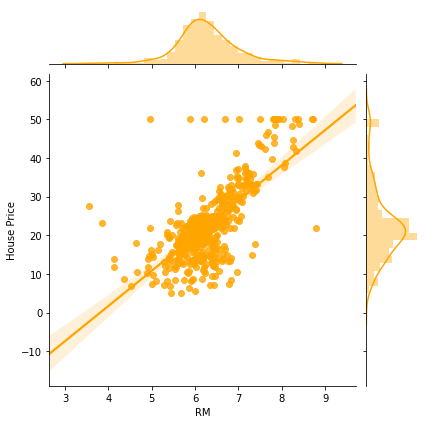

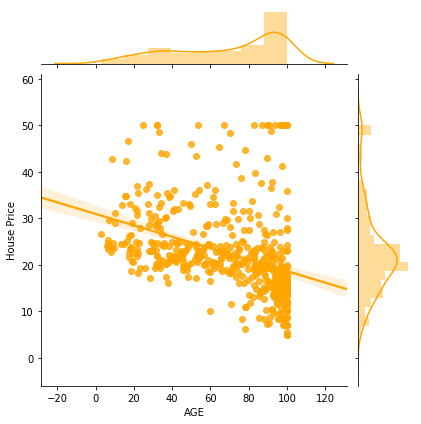

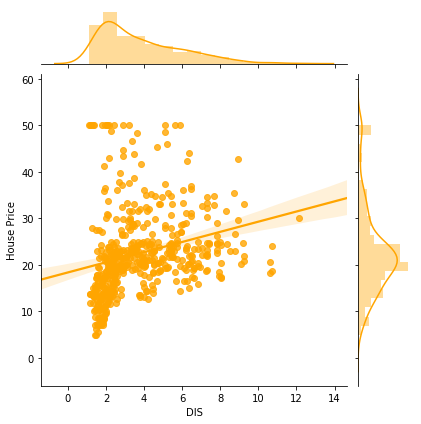

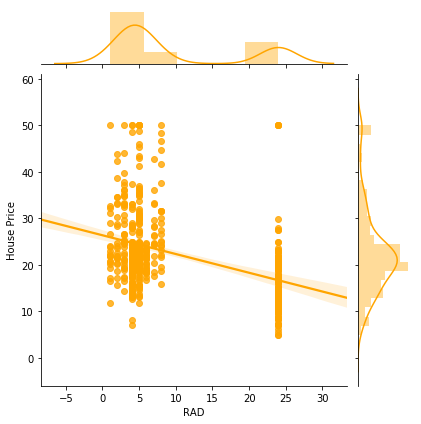

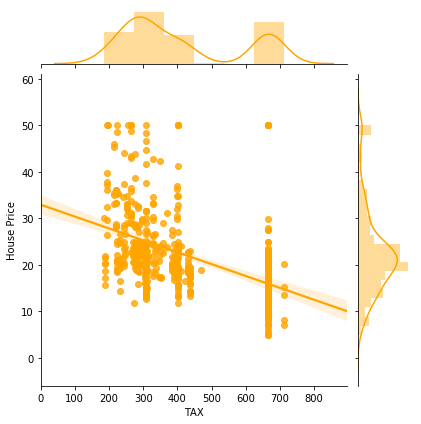

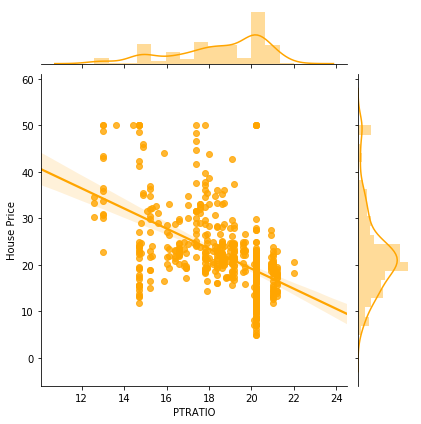

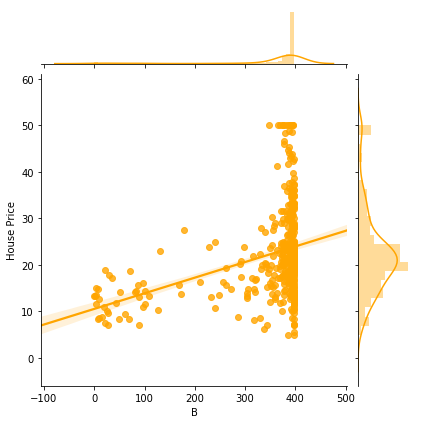

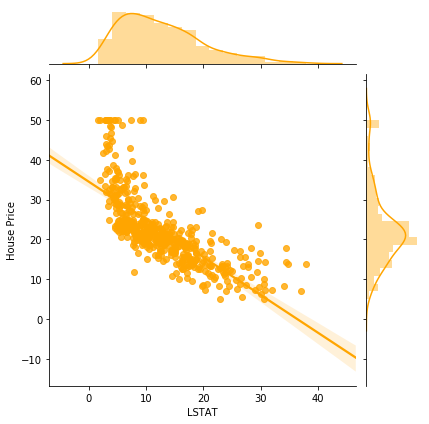

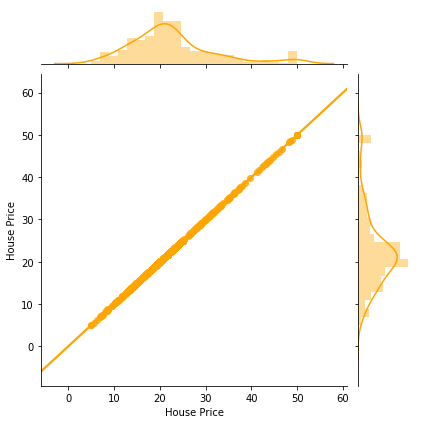

In [36]:
def joint_plot():
    for f in full_data:
        sns.jointplot(x=f, y="House Price", data=full_data, kind="reg", color="orange")
print(joint_plot())

## Split data for training and testing machine learning model データ分割

In [39]:
# split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30)

## Feature Normalization 特徴量の標準化

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
scaler.transform(X_train)

array([[3.70968633e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 8.86403752e-01, 5.44150110e-01],
       [8.88507718e-04, 0.00000000e+00, 9.23387097e-01, ...,
        6.91489362e-01, 9.51510414e-01, 3.46026490e-01],
       [1.93532295e-04, 8.50000000e-01, 1.02639296e-02, ...,
        5.00000000e-01, 1.00000000e+00, 1.11479029e-01],
       ...,
       [8.47026797e-04, 0.00000000e+00, 8.90762463e-02, ...,
        5.74468085e-01, 1.00000000e+00, 1.23068433e-01],
       [1.33516475e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 5.38355408e-01],
       [3.49949366e-03, 0.00000000e+00, 2.96920821e-01, ...,
        8.82978723e-01, 9.85702759e-01, 3.81346578e-01]])

In [40]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

print("X_test shape:",X_test.shape)
print("y_test:",y_test.shape)

X_train shape: (354, 13)
y_train shape: (354, 1)
X_test shape: (152, 13)
y_test: (152, 1)


## Training Model & Testing 

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_test)
lr.score(X_train, y_train)

0.7522728006636712

In [50]:
y_predict = lr.predict(X_test)

In [43]:
lr.score(X_test, y_test)

0.7011181463169912

## Evaluate Model by several metrics for regression problem モデルの評価

MAE (Mean Absolute Error) 平均絶対誤差

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

3.4527644180585955

MSE (Mean Squared Error) 平均絶対誤差

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

24.892896648996384

RMSE (Root Mean Squared Error) 平均絶対誤差

In [54]:
np.sqrt(mean_squared_error(y_test, y_predict))

4.989278169133926

 R2 (R-squared, coefficient of determination) 決定係数

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7011181463169913

In [45]:
lr.coef_

array([[-1.31642212e-01,  5.38932329e-02, -1.07106000e-02,
         1.49568943e+00, -1.73745543e+01,  3.79203879e+00,
         5.77350494e-03, -1.61080459e+00,  3.02515768e-01,
        -1.23407907e-02, -8.91466951e-01,  1.19582003e-02,
        -5.45272602e-01]])